In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [46]:
file_path = '../output/state/'
files = sorted(os.listdir(file_path))
print(files)

['critical_prob=0.0&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=3&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=5&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=7&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=9&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.2&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.2&num_states=3&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.2&num_states=5&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.2&num_states=7&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.2&num_states=9&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.4&num_states=1&num_tasks=15&period=[10, 100]&task_ma

In [47]:
cfg = get_config('../cfg/state_exp_cfg.json')
state_less = {}
state_wise = {}

critical_prob_list = cfg['critical_prob_list']


for state_num in cfg['num_states_list'] :
    state_less[str(state_num)] = [ 0.0 ] * len(critical_prob_list)
    state_wise[str(state_num)] = [ 0.0 ] * len(critical_prob_list)

In [48]:
critical_prob_index = {str(p): i for i, p in enumerate(critical_prob_list)}

for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_less, core_wise = get_file_avg(file_path + file)

    num_states = params['num_states']
    critical_prob = params['critical_prob']

    state_less[num_states][critical_prob_index[critical_prob]] += core_less
    state_wise[num_states][critical_prob_index[critical_prob]] += core_wise


In [49]:
print(state_less)
print(state_wise)

{'1': [3.994, 4.158, 4.512, 4.768, 5.16, 5.454], '3': [3.992, 4.392, 4.97, 5.59, 6.26, 7.392], '5': [3.97, 4.444, 4.968, 5.734, 6.722, 7.958], '7': [3.982, 4.482, 5.162, 5.802, 6.722, 8.114], '9': [3.984, 4.476, 5.126, 5.876, 6.798, 8.262]}
{'1': [3.994, 4.158, 4.512, 4.768, 5.16, 5.454], '3': [3.992, 4.344, 4.768, 5.268, 5.736, 6.28], '5': [3.97, 4.392, 4.898, 5.488, 6.02, 6.598], '7': [3.982, 4.462, 5.048, 5.592, 6.19, 6.75], '9': [3.984, 4.444, 5.1, 5.696, 6.24, 6.918]}


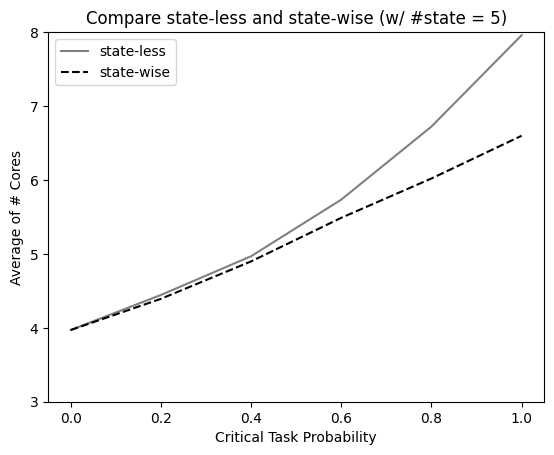

In [76]:
# Compare state-wise and state-less with criticality probability (#state = vis_state_num)

vis_state_num = '5'

ax = plt.gca()

plt.plot(critical_prob_list, state_less[vis_state_num], label='state-less', color='gray')
plt.plot(critical_prob_list, state_wise[vis_state_num], label='state-wise', color='black', linestyle='dashed')

plt.title(f'Compare state-less and state-wise (w/ #state = {vis_state_num})')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of # Cores')
plt.legend()

ax.set_ylim([3, 8])
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

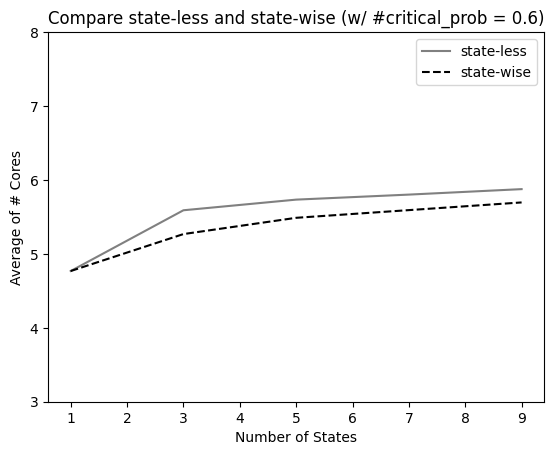

In [75]:
# Compare state-wise and state-less with #states (#critical_prob = vis_critical_prob)

vis_critical_prob = '0.6'

ax = plt.gca()

index = critical_prob_index[vis_critical_prob]
state_list = cfg['num_states_list']

def get_state_list(output_dict, index) :
    return [output_dict[str(s)][index] for s in state_list]

plt.plot(state_list, get_state_list(state_less, index), label='state-less', color='gray')
plt.plot(state_list, get_state_list(state_wise, index), label='state-wise', color='black', linestyle='dashed')

plt.title(f'Compare state-less and state-wise (w/ #critical_prob = {vis_critical_prob})')
plt.xlabel('Number of States')
plt.ylabel('Average of # Cores')
plt.legend()

ax.set_ylim([3, 8])
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# ax.yaxis.set_major_locator(plt.AutoLocator())
# ax.yaxis.set_major_locator(plt.IndexLocator(base=1, offset=0))

plt.show()